In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ibm_dataset = pd.read_csv('IBM Attrition Data.csv')
ibm_dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
ibm_age_distribution = ibm_dataset.groupby('Age').size()

In [4]:
ibm_age_distribution

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
dtype: int64

(array([6., 7., 8., 4., 2., 5., 1., 5., 3., 2.]),
 array([ 4. , 11.4, 18.8, 26.2, 33.6, 41. , 48.4, 55.8, 63.2, 70.6, 78. ]),
 <a list of 10 Patch objects>)

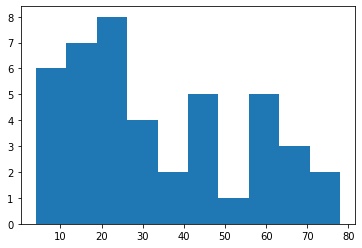

In [5]:
plt.hist(ibm_age_distribution,bins=10)

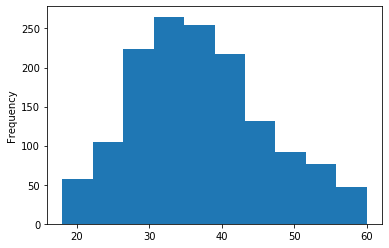

In [6]:
ibm_dataset['Age'].plot.hist()

In [7]:
attrition_yes = ibm_dataset.groupby('Attrition').get_group('Yes')
attrition_no = ibm_dataset.groupby('Attrition').get_group('No')

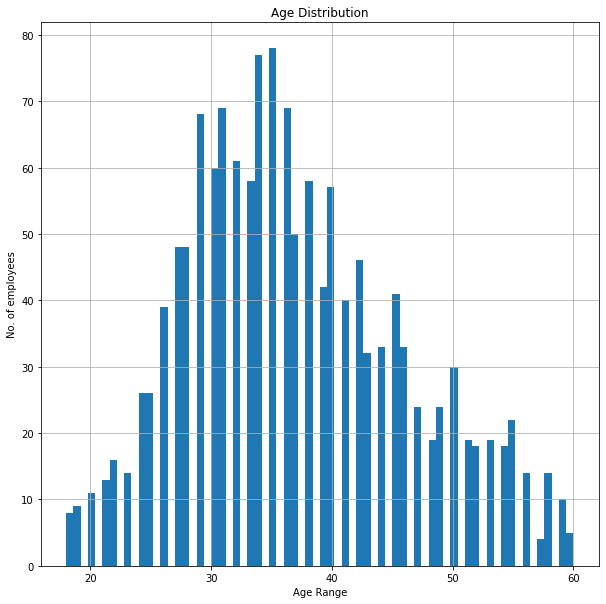

In [8]:
plt.figure(figsize=(10,10))
ibm_dataset['Age'].hist(bins=70)
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('No. of employees')
plt.show()

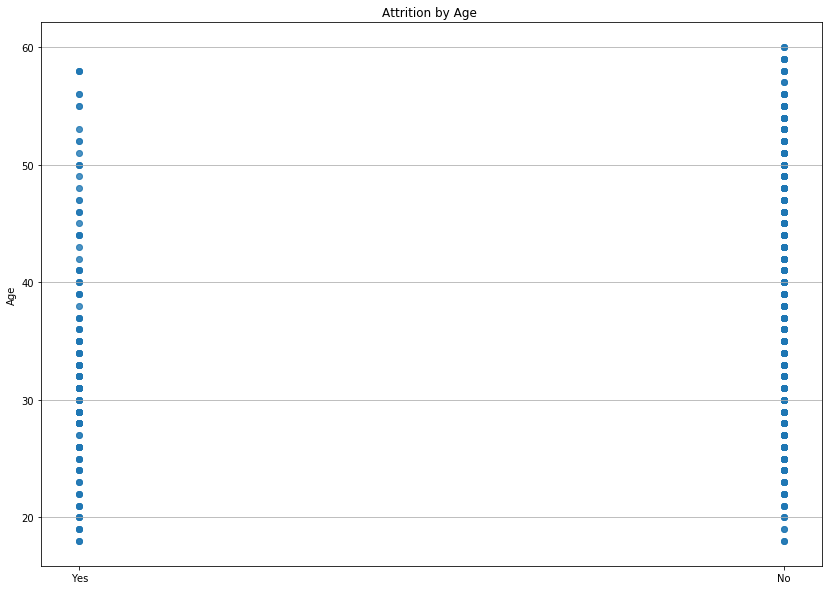

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(ibm_dataset['Attrition'],ibm_dataset['Age'],alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

In [10]:
ibm_dataset.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [11]:
ibm_dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
ibm_education = ibm_dataset.groupby('EducationField')
ibm_education.size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

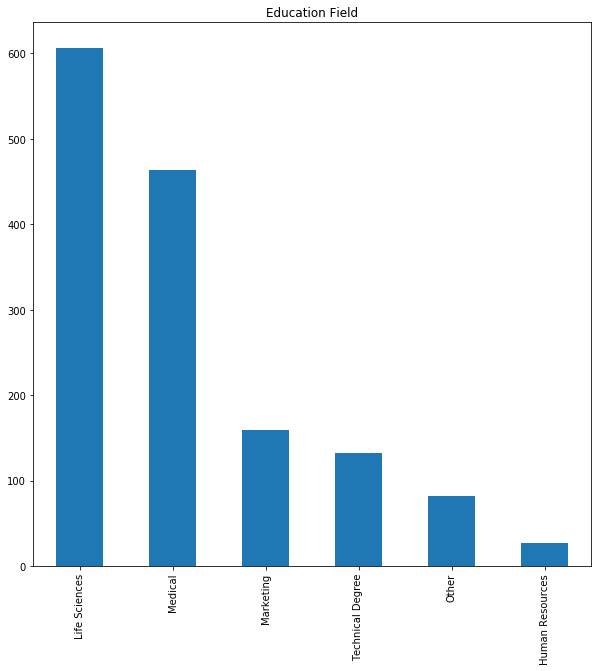

In [13]:
plt.figure(figsize=(10,10))
ibm_dataset['EducationField'].value_counts().plot.bar()
plt.title('Education Field')
plt.show()

In [14]:
ibm_dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [15]:
ibm_martial_status = ibm_dataset.groupby('MaritalStatus')
ibm_martial_status.size()

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

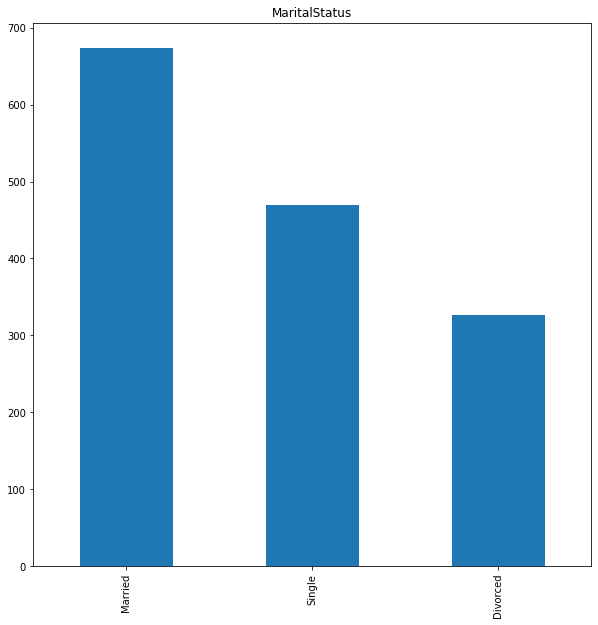

In [57]:
plt.figure(figsize=(10,10))
ibm_dataset['MaritalStatus'].value_counts().plot.bar()
plt.title('MaritalStatus')
plt.show()

In [16]:
ibm_dataset['Attrition'].replace(('Yes','No'),(1,0), inplace=True)

In [17]:
ibm_dataset['EducationField'].replace('Life Sciences',1, inplace=True)
ibm_dataset['EducationField'].replace('Medical',2, inplace=True)
ibm_dataset['EducationField'].replace('Marketing', 3, inplace=True)
ibm_dataset['EducationField'].replace('Other',4, inplace=True)
ibm_dataset['EducationField'].replace('Technical Degree',5, inplace=True)
ibm_dataset['EducationField'].replace('Human Resources', 6, inplace=True)

In [18]:
ibm_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [19]:
X_features = ibm_dataset[['Age','Education','JobSatisfaction','WorkLifeBalance','YearsAtCompany','EducationField']]
Y_target = ibm_dataset['Attrition']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.25, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
ypred = logReg.predict(X_test)

In [23]:
print('Accurate:',y_test.values[0:30])
print('Predicted:',ypred[0:30])

Accurate: [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,ypred))

0.845108695652174


In [25]:
ibm_dataset.dtypes

Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [26]:
ibm_dataset.groupby('Department').size()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64